In [1]:
# 继续沿用上一个例子
import numpy as np
import matplotlib.pylab as plt
X = np.empty(shape=[100,2])
X[:,0] = np.random.uniform(0.,100.,size = 100)
X[:,1] = 0.75*X[:,0] + 3. + np.random.normal(0.,10.,size=100)


In [2]:
def demean(X):
    return X - np.mean(X,axis = 0)

In [19]:
def f(X,w):
    '''
    X:为样本矩阵
    w：为样本所要映射的方向向量
    '''
    X = demean(X)
    return (X.dot(w)).T.dot(X).dot(w)/len(X)

def df(X,w):
    '''
    X:为样本矩阵
    w：为样本所要映射的方向向量
    '''
    X = demean(X)
    return X.T.dot(X).dot(w)*2./len(X)

# 注意 我们假设w是单位的方向向量，但是，在每次迭代更新w时，并不能保证w一直是单位向量，故需要将w单位化
def unit_w(w):
    return w/np.linalg.norm(w)

def first_component(X, init_w, eta = 0.001, n_iters = 1e4, epsilon = 1e-8):
    '''
    X: 样本矩阵
    init_w: 初始化的方向向量
    '''
    w = init_w
    w = unit_w(w)
    i_iters = 0
    while i_iters < n_iters:
        i_iters +=1
        last_w = w
        w = w + eta*df(X,w)
        w = unit_w(w)
        if f(X,w) -  f(X,last_w) <= epsilon:
            break 
        
    return w

def first_n_component(X, n, eta = 0.001, n_iters = 1e4, epsilon = 1e-8):
    '''
    eta : 学习速率
    n_iters；迭代的最大次数
    epsilon : 残差（当前函数值与上次函数值之间的差值）的最小值
    
    '''
    X = demean(X)
    X_pca = X.copy()
    n_component = []
    init_w = np.random.random(size = X.shape[1])
    for i in range(n):
        w = first_component(X_pca, init_w)
        n_component.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
    return n_component
    

In [20]:
n = 2
w = first_n_component(X, n)
w

[array([0.79031365, 0.61270248]), array([-0.61268522,  0.79032703])]

# 可视化计算结果

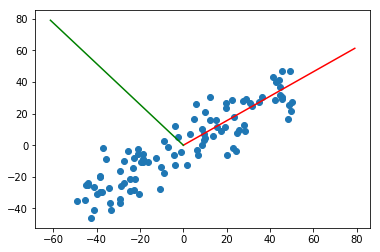

In [27]:
X = demean(X)
plt.scatter(X[:,0], X[:,1])
plt.plot([0,w[0][0]*100],[0,w[0][1]*100],color = 'r')
plt.plot([0,w[1][0]*100],[0,w[1][1]*100],color = 'g')
plt.show()

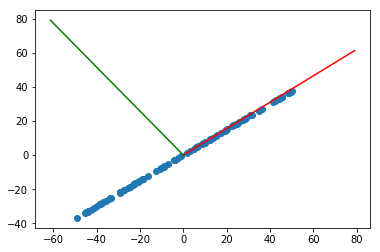

In [28]:
X[:,1] = 0.75*X[:,0] + 3.  # 若不加噪声
X = demean(X)
plt.scatter(X[:,0], X[:,1])
plt.plot([0,w[0][0]*100],[0,w[0][1]*100],color = 'r')
plt.plot([0,w[1][0]*100],[0,w[1][1]*100],color = 'g')
plt.show()

与理论分析的结果一致

In [31]:
# 两个主成分的方向垂直，即其内乘积为0
w[0].dot(w[1])

2.1836918800810512e-05